Analyze wandb logs

In [ ]:
import wandb
import pandas as pd

# Run wandb login on the command line and paste in your API key
api = wandb.Api()
entity, project = "mjavad", "tuh_sc_hps_pp3_cp"  
runs = api.runs(entity + "/" + project) 

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains output keys/values for 
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("project.csv")

In [ ]:
all_runs = []
ids_to_load_train = []
valid_loss_wo = []
valid_loss_w = []
for run in runs:
    if run.state == 'finished':
        if 'TUH_deep4_hps_pp3_wN_woAug_' in run.name: #index2_number2700
            all_runs.append(run)
            valid_loss_wo.append(run.summary['valid_loss'])
        elif 'TUH_deep4_hps_pp3_wN_wAug_' in run.name: #index2_number2700
            all_runs.append(run)
            valid_loss_w.append(run.summary['valid_loss'])

In [ ]:
import numpy as np
print(np.mean(valid_loss_w), np.std(valid_loss_w))
print(np.mean(valid_loss_wo),np.std(valid_loss_wo))


In [ ]:
import csv

rows = zip(valid_loss_w, valid_loss_wo)#, list3, list4, list5)

# Open a csv file in write mode
with open("data.csv", "w") as f:
    # Create a csv writer object
    writer = csv.writer(f, quoting=csv.QUOTE_ALL)
    writer.writerow(['valid_loss','w=0,wo=1'])
    for row in valid_loss_w:
        writer.writerow([row, '0'])
    for row in valid_loss_wo:
        writer.writerow([row, '1'])

plot loss vs data size

In [1]:
import wandb
import pandas as pd
# Run wandb login on the command line and paste in your API key
api = wandb.Api()
entity, project = "mjavad", "tuh_sc_hps_pp3_cp_wN"  
runs = api.runs(entity + "/" + project) 

In [2]:
all_runs = []
ids_to_load_train2 = []
test_loss = []
run_name = []
pre_train = []
test_b_acc =[]
for run in runs:
    if run.state == 'finished':
        if 'NMT_deep4_hps_pp3_wN_wAug_WoPt81_index0' in run.name or 'NMT_deep4_hps_pp3_wN_wAug_WPt81_index9' in run.name: 
            try:
                all_runs.append(run)
                test_loss.append(run.summary['loss_nmt'])
                test_b_acc.append(run.summary['b_acc_nmt'])
                run_name.append(run.name)
                pre_train.append(run.config["pre_trained"])
                ids_to_load_train2.append(run.config["ids_to_load_train2"])
            except:
                print(run.name)
                # run.delete()
                
        
        # elif 'TUH_deep4_hps_pp3_wN_wAug_' in run.name: 
        #     all_runs.append(run)
        #     valid_loss_w.append(run.summary['valid_loss'])

In [67]:
all_runs = []
ids_to_load_train2 = []
test_loss = []
run_name = []
pre_train = []
test_b_acc =[]
for run in runs:
    if run.state == 'finished': # NMT_deep4_hps_pp3_wN_wAug_WoPt81_28jul2045_index
        if 'NMT_deep4_hps_pp3_woN_wAug_WoPt81_lr001_index' in run.name or 'NMT_deep4_hps_pp3_woN_wAug_WPt81_lr001_index' in run.name: 
            try:
                all_runs.append(run)
                test_loss.append(run.summary['loss_nmt'])
                test_b_acc.append(run.summary['b_acc_nmt'])
                run_name.append(run.name)
                pre_train.append(run.config["pre_trained"])
                ids_to_load_train2.append(run.config["ids_to_load_train2"])
            except:
                print(run.name)
                # run.delete()
                
        
        # elif 'TUH_deep4_hps_pp3_wN_wAug_' in run.name: 
        #     all_runs.append(run)
        #     valid_loss_w.append(run.summary['valid_loss'])

In [68]:
df = pd.DataFrame({'run_name': run_name, 'Pre-Train': pre_train,'ids_to_load_train2': ids_to_load_train2, 'test_loss': test_loss, 'test_b_acc': test_b_acc})
# df.head()
df = df.assign(run_name_tranc = lambda x: x.run_name.str.split('_').str[:-4].str.join('_'))
df["ids_to_load_train2"] = df["ids_to_load_train2"].replace(0, 20)
df.head(10)


,run_name,Pre-Train,ids_to_load_train2,test_loss,test_b_acc,run_name_tranc
0,NMT_deep4_hps_pp3_woN_wAug_WPt81_lr001_index3_...,True,2100,0.551954,0.783985,NMT_deep4_hps_pp3_woN_wAug
1,NMT_deep4_hps_pp3_woN_wAug_WPt81_lr001_index4_...,True,2100,0.766914,0.722533,NMT_deep4_hps_pp3_woN_wAug
2,NMT_deep4_hps_pp3_woN_wAug_WPt81_lr001_index2_...,True,2100,0.572411,0.763501,NMT_deep4_hps_pp3_woN_wAug
3,NMT_deep4_hps_pp3_woN_wAug_WPt81_lr001_index1_...,True,2100,0.656880,0.705773,NMT_deep4_hps_pp3_woN_wAug
4,NMT_deep4_hps_pp3_woN_wAug_WPt81_lr001_index0_...,True,2100,0.660021,0.705773,NMT_deep4_hps_pp3_woN_wAug
5,NMT_deep4_hps_pp3_woN_wAug_WPt81_lr001_index3_...,True,1500,0.745412,0.724395,NMT_deep4_hps_pp3_woN_wAug
6,NMT_deep4_hps_pp3_woN_wAug_WPt81_lr001_index4_...,True,1500,0.686105,0.745810,NMT_deep4_hps_pp3_woN_wAug
7,NMT_deep4_hps_pp3_woN_wAug_WPt81_lr001_index2_...,True,1500,0.963032,0.667598,NMT_deep4_hps_pp3_woN_wAug
8,NMT_deep4_hps_pp3_woN_wAug_WPt81_lr001_index1_...,True,1500,0.642631,0.728119,NMT_deep4_hps_pp3_woN_wAug
9,NMT_deep4_hps_pp3_woN_wAug_WPt81_lr001_index0_...,True,1500,0.634915,0.742086,NMT_deep4_hps_pp3_woN_wAug


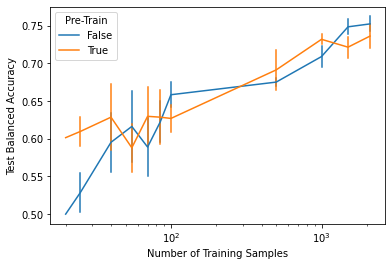

In [70]:
import seaborn as sns

# sns.lineplot(x="ids_to_load_train2", y="test_loss", hue='pre_train', data=df, errorbar="se")
fig = sns.lineplot(x="ids_to_load_train2", y="test_b_acc", hue='Pre-Train', data=df, errorbar="se", err_style="bars") #, None), orient='y')
# sns.lineplot(x="ids_to_load_train2", y="test_b_acc", hue='run_name_tranc', data=df, errorbar="se") #, None), orient='y')



import matplotlib.pyplot as plt
ax = plt.gca() # Get the current axes object
ax.set_xscale('log') # Set the y axis scale to log
# plt.xlim([-1,100])
plt.ylabel('Test Balanced Accuracy')
plt.xlabel('Number of Training Samples')

# save the figure as an SVG file
plt.savefig("../output/pt_Won_tuh_to_nmt.svg", format="svg")


for TUH

In [52]:
all_runs = []
ids_to_load_train2 = []
test_loss = []
run_name = []
pre_train = []
test_b_acc =[]
for run in runs:
    if run.state == 'finished': # NMT_deep4_hps_pp3_wN_wAug_WoPt81_28jul2045_index
        if 'NMT_deep4_hps_pp3_wN_wAug_WoPt81_lr001_index' in run.name or 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index' in run.name: 
            try:
                all_runs.append(run)
                test_loss.append(run.summary['loss_tuh'])
                test_b_acc.append(run.summary['b_acc_tuh'])
                run_name.append(run.name)
                pre_train.append(run.config["pre_trained"])
                ids_to_load_train2.append(run.config["ids_to_load_train2"])
            except:
                print(run.name)
                # run.delete()
                
        
        # elif 'TUH_deep4_hps_pp3_wN_wAug_' in run.name: 
        #     all_runs.append(run)
        #     valid_loss_w.append(run.summary['valid_loss'])

In [53]:
df = pd.DataFrame({'run_name': run_name, 'pre_train': pre_train,'ids_to_load_train2': ids_to_load_train2, 'test_loss': test_loss, 'test_b_acc': test_b_acc})
# df.head()
df = df.assign(run_name_tranc = lambda x: x.run_name.str.split('_').str[:-4].str.join('_'))
df["ids_to_load_train2"] = df["ids_to_load_train2"].replace(0, 20)
df.head(10)


,run_name,pre_train,ids_to_load_train2,test_loss,test_b_acc,run_name_tranc
0,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index2_n...,True,2100,1.668861,0.570106,NMT_deep4_hps_pp3_wN_wAug
1,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index4_n...,True,2100,1.373027,0.638519,NMT_deep4_hps_pp3_wN_wAug
2,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index3_n...,True,2100,0.927375,0.613810,NMT_deep4_hps_pp3_wN_wAug
3,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index4_n...,True,1500,1.233279,0.670265,NMT_deep4_hps_pp3_wN_wAug
4,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index3_n...,True,1500,1.148934,0.624021,NMT_deep4_hps_pp3_wN_wAug
5,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index2_n...,True,1500,1.928610,0.529762,NMT_deep4_hps_pp3_wN_wAug
6,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index4_n...,True,1000,1.049945,0.676164,NMT_deep4_hps_pp3_wN_wAug
7,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index3_n...,True,1000,1.173290,0.567196,NMT_deep4_hps_pp3_wN_wAug
8,NMT_deep4_hps_pp3_wN_wAug_WoPt81_lr001_index4_...,False,2100,0.822983,0.658730,NMT_deep4_hps_pp3_wN_wAug
9,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index4_n...,True,500,0.878759,0.711058,NMT_deep4_hps_pp3_wN_wAug


Text(0.5, 0, 'Number of Training Samples')

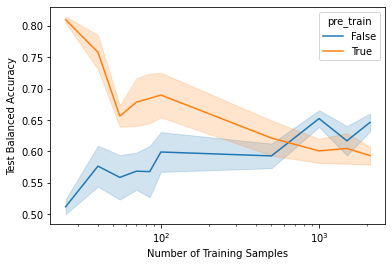

In [54]:
import seaborn as sns

# sns.lineplot(x="ids_to_load_train2", y="test_loss", hue='pre_train', data=df, errorbar="se")
sns.lineplot(x="ids_to_load_train2", y="test_b_acc", hue='pre_train', data=df, errorbar="se")#, err_style="bars") #, None), orient='y')
# sns.lineplot(x="ids_to_load_train2", y="test_b_acc", hue='run_name_tranc', data=df, errorbar="se") #, None), orient='y')



import matplotlib.pyplot as plt
ax = plt.gca() # Get the current axes object
ax.set_xscale('log') # Set the y axis scale to log
# plt.xlim([-1,100])
plt.ylabel('Test Balanced Accuracy')
plt.xlabel('Number of Training Samples')


(0.0, 100.0)

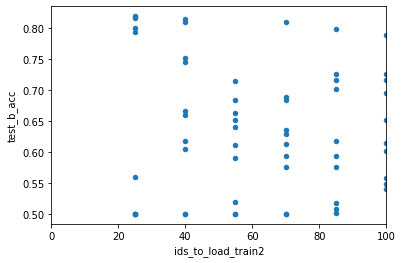

In [55]:
# run = runs[-2]
df[df["ids_to_load_train2"]==0]
df.plot(x="ids_to_load_train2", y="test_b_acc", kind="scatter")
plt.xlim(0, 100)

In [56]:
# df[df["ids_to_load_train2"]]["ids_to_load_train2"]=1
df["ids_to_load_train2"] = df["ids_to_load_train2"].replace(0, 1)
df


,run_name,pre_train,ids_to_load_train2,test_loss,test_b_acc,run_name_tranc
0,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index2_n...,True,2100,1.668861,0.570106,NMT_deep4_hps_pp3_wN_wAug
1,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index4_n...,True,2100,1.373027,0.638519,NMT_deep4_hps_pp3_wN_wAug
2,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index3_n...,True,2100,0.927375,0.613810,NMT_deep4_hps_pp3_wN_wAug
3,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index4_n...,True,1500,1.233279,0.670265,NMT_deep4_hps_pp3_wN_wAug
4,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index3_n...,True,1500,1.148934,0.624021,NMT_deep4_hps_pp3_wN_wAug
...,...,...,...,...,...,...
95,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index0_n...,True,85,1.495651,0.576720,NMT_deep4_hps_pp3_wN_wAug
96,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index0_n...,True,70,1.289577,0.613757,NMT_deep4_hps_pp3_wN_wAug
97,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index0_n...,True,55,0.886017,0.662804,NMT_deep4_hps_pp3_wN_wAug
98,NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index0_n...,True,40,0.922475,0.666005,NMT_deep4_hps_pp3_wN_wAug


In [57]:
run.summary.keys()

dict_keys(['valid_loss', 'dur', 'train_accuracy', '_step', 'valid_f1', 'gradients/bnorm_2.bias', 'train_f1', 'gradients/bnorm.bias', 'gradients/bnorm_3.bias', 'loss_tuh', 'b_acc_merge', 'loss_nmt', 'gradients/bnorm_2.weight', 'valid_balanced_accuracy', 'gradients/bnorm_4.weight', 'gradients/conv_classifier.weight', 'gradients/conv_4.weight', 'b_acc_nmt', 'gradients/conv_3.weight', '_runtime', 'b_acc_tuh', 'gradients/conv_2.weight', 'train_loss', 'gradients/conv_classifier.bias', 'gradients/bnorm.weight', 'loss_merge', 'train_balanced_accuracy', '_wandb', 'gradients/bnorm_4.bias', 'gradients/conv_time.bias', 'valid_accuracy', 'gradients/bnorm_3.weight', 'gradients/conv_time.weight', 'gradients/conv_spat.weight', '_timestamp'])

In [58]:
run_name

['NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index2_number2100',
 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index4_number2100',
 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index3_number2100',
 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index4_number1500',
 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index3_number1500',
 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index2_number1500',
 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index4_number1000',
 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index3_number1000',
 'NMT_deep4_hps_pp3_wN_wAug_WoPt81_lr001_index4_number2100',
 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index4_number500',
 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index2_number1000',
 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index4_number100',
 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index3_number500',
 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_index4_number85',
 'NMT_deep4_hps_pp3_wN_wAug_WoPt81_lr001_index2_number2100',
 'NMT_deep4_hps_pp3_wN_wAug_WoPt81_lr001_index3_number2100',
 'NMT_deep4_hps_pp3_wN_wAug_WPt81_lr001_in

In [59]:
ids_to_load_train

NameError: name 'ids_to_load_train' is not defined